# Pendulum system using Lagrange's equation

Defines a LagrangianPendulum class that is used to generate basic pendulum plots from solving Lagrange's equations.

This notebook is for animate the motion of double pendulums.

In [197]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint, solve_ivp
from numpy import sin, cos
import matplotlib.pyplot as plt

# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

#above is from Jupiter notebook "Lagrangian_pendulum"

## Pendulum class and utility functions

In [198]:
class Lagrangian2Pendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of pendulum 1
    L2 : float
        length of pendulum 2
    g : float
        gravitational acceleration at the earth's surface
    m1 : float
        mass of pendulum 1
    m2 : float
        mass of pendulum 2

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., m1=1., L2=1., m2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi1/dt d^2phi1/dt^2 dphi2/dt d^2phi2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi1(t), y[1] = dphi1/dt, y[2] = phi2(t) and y[3] = dphi2/dt
            
        Returns
        -------
        
        """ 
        A = (self.L1/self.L2)*(y[1])**2*np.sin(y[0]-y[2])
        B = self.g*np.sin(y[2])/self.L2      
        C = (self.L2/self.L1)*(self.m2/(self.m1+self.m2))*(y[3])**2*np.sin(y[0]-y[2])
        D = self.g*np.sin(y[0])/self.L1
        E = (self.L2/self.L1)*(self.m2/(self.m1+self.m2))*np.cos(y[0]-y[2])
        F  = (self.L1/self.L2)*np.cos(y[0]-y[2])    
        return [y[1], ((-1.* C - D) - E * (A-B)) / (1 - E * F), y[3], (-F * (-1.*C-D) + (A-B)) / (1 - E * F)]
 
    
    def solve_ode(self, t_pts, phi_1_0=np.pi/2, phi_1_dot_0=0., phi_2_0=np.pi, phi_2_dot_0=0.,
                  abserr=1.0e-12, relerr=1.0e-12):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        
        phi_1, phi_1_dot, phi_2, phi_2_dot = solution.y
        return phi_1, phi_1_dot, phi_2, phi_2_dot
    
    def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
        """
        Generic plotting function: return a figure axis with a plot of y vs. x,
        with line color and style, title, axis labels, and line label
        """
        if ax is None:        # if the axis object doesn't exist, make one
            ax = plt.gca()

        if (semilogy):
            line, = ax.semilogy(x, y, label=label, 
                                color=color, linestyle=linestyle)
        elif (loglog):
            line, = ax.loglog(x, y, label=label, 
                              color=color, linestyle=linestyle)
        else:
            line, = ax.plot(x, y, label=label, 
                        color=color, linestyle=linestyle)

        if label is not None:    # if a label if passed, show the legend
            ax.legend()
        if title is not None:    # set a title if one if passed
            ax.set_title(title)
        if axis_labels is not None:  # set x-axis and y-axis labels if passed  
            ax.set_xlabel(axis_labels[0])
            ax.set_ylabel(axis_labels[1])

        return ax, line
    def start_stop_indices(t_pts, plot_start, plot_stop):
        start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
        stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
        return start_index, stop_index

## Double Pendulum Plots 

Text(0, 0.5, '$\\theta(t)$')

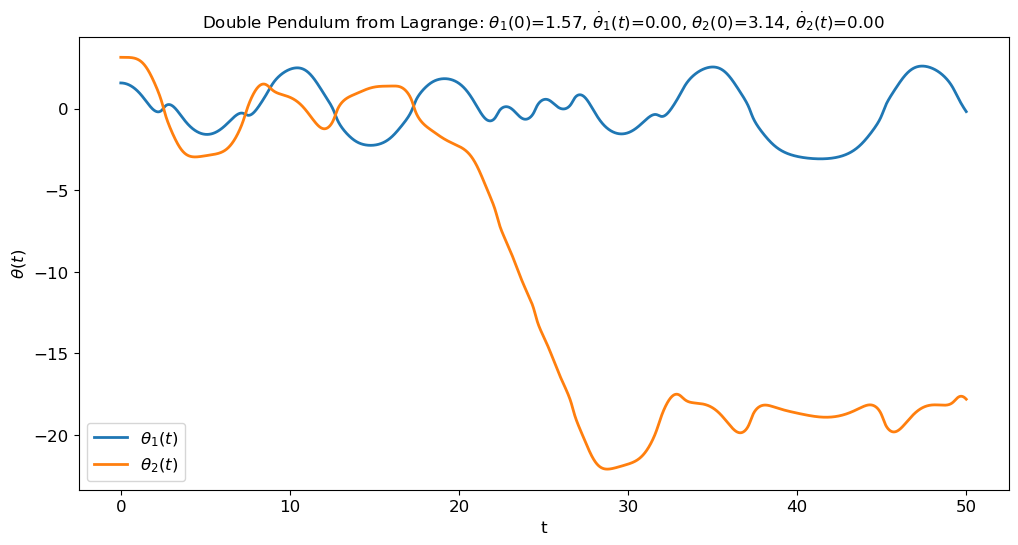

In [199]:
# chekc the result
t_pts = np.arange(0, 50, 0.001)
phi_1_0=np.pi/2
phi_1_dot_0=0.
phi_2_0=np.pi
phi_2_dot_0=0.
p1 = Lagrangian2Pendulum()
phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, phi_1_0=phi_1_0, phi_1_dot_0=phi_1_dot_0, 
                                                  phi_2_0=phi_2_0, phi_2_dot_0=phi_2_dot_0)

plt.figure(figsize=(12,6))
plt.title(r'Double Pendulum from Lagrange: $\theta_1(0)$=1.57, $\dot\theta_1(t)$=0.00, $\theta_2(0)$=3.14, $\dot\theta_2(t)$=0.00', fontsize=font_size)
plt.plot(t_pts, phi_1, linewidth=2.0, label=r'$\theta_1(t)$')
plt.plot(t_pts, phi_2, linewidth=2.0, label=r'$\theta_2(t)$')
plt.legend(fontsize=font_size)
plt.xlabel(r't', fontsize=font_size)
plt.ylabel(r'$\theta(t)$', fontsize=font_size)

In [200]:
# Labels for individual plot axes
phi1_vs_time_labels = (r'$t$', r'$\phi_1(t)$')
phi1_dot_vs_time_labels = (r'$t$', r'$d\phi_1/dt(t)$')
state_space1_labels = (r'$\phi_1$', r'$d\phi_1/dt$')
phi2_vs_time_labels = (r'$t$', r'$\phi_2(t)$')
phi2_dot_vs_time_labels = (r'$t$', r'$d\phi_2/dt(t)$')
state_space2_labels = (r'$\phi_2$', r'$d\phi_2/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  
###################################################################################################
#change initial conditions here!!!
L1 = 1.
L2 = 1.
g = 1.
m1 = 1.
m2 = 1.
phi_1_0 = (3./4.)*np.pi
phi_1_dot_0 = 0.
phi_2_0 = (1./4.)*np.pi
phi_2_dot_0 = 0.
phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0)
#####################################################################################################

# Instantiate a pendulum 
p1 = Lagrangian2Pendulum(L1=L1, L2=L2, g=g, m1=m1, m2=m2)

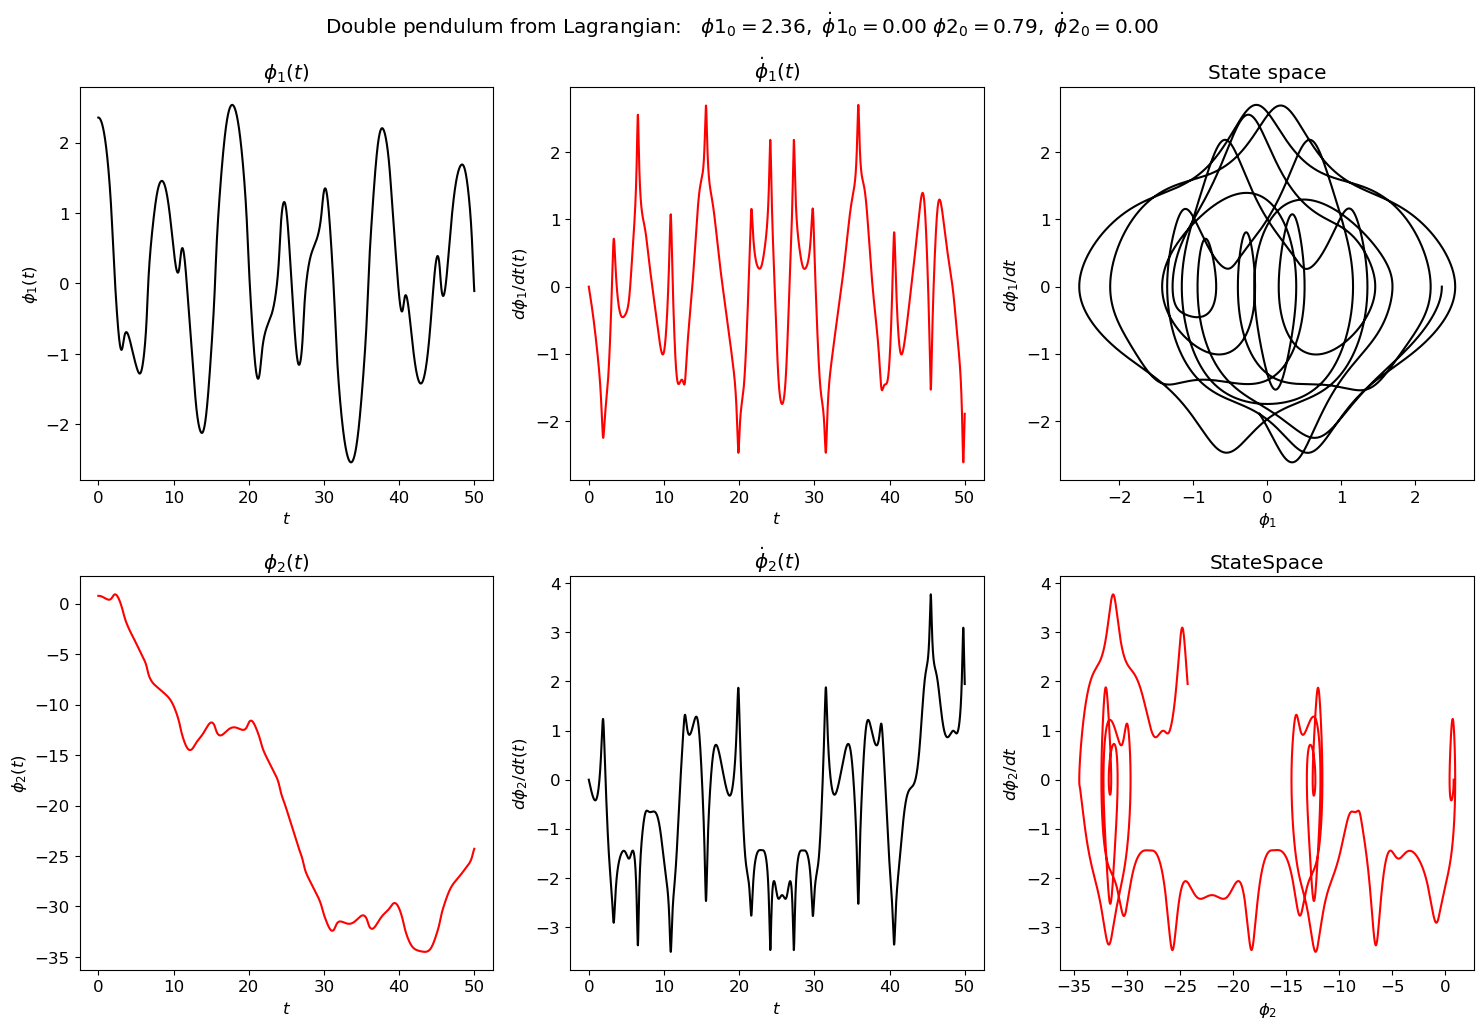

In [201]:
# start the plot!
fig = plt.figure(figsize=(15,10))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\phi1_0 = {phi1_0:.2f},$' + \
                rf' $\dot\phi1_0 = {phi1_dot_0:.2f}$' + \
                rf' $\phi2_0 = {phi2_0:.2f},$' + \
                rf' $\dot\phi2_0 = {phi2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi_1 plot 
ax_a = fig.add_subplot(2,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi1_vs_time_labels, 
            color='black',
            label=None, 
            title=r'$\phi_1(t)$', 
            ax=ax_a)    
                              
# second plot: phi_1_dot plot 
ax_b = fig.add_subplot(2,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1_dot[start : stop], 
            axis_labels=phi1_dot_vs_time_labels, 
            color='red',
            label=None, 
            title=r'$\dot\phi_1(t)$', 
            ax=ax_b)    

# third plot: state space 1 plot
ax_c = fig.add_subplot(2,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi1[start : stop], phi1_dot[start : stop], 
            axis_labels=state_space1_labels, 
            color='black',
            label=None, 
            title='State space', 
            ax=ax_c)    

# fourth plot: phi_2 plot 
ax_d = fig.add_subplot(2,3,4)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi2_vs_time_labels, 
            color='red',
            label=None, 
            title=r'$\phi_2(t)$', 
            ax=ax_d)    
                              
# fifth plot: phi_2_dot plot 
ax_e = fig.add_subplot(2,3,5)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2_dot[start : stop], 
            axis_labels=phi2_dot_vs_time_labels, 
            color='black',
            label=None, 
            title=r'$\dot\phi_2(t)$', 
            ax=ax_e)    

# sixth plot: state space 2 plot 
ax_f = fig.add_subplot(2,3,6)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi2[start : stop], phi2_dot[start : stop], 
            axis_labels=state_space2_labels, 
            color='red',
            label=None, 
            title='StateSpace', 
            ax=ax_f) 

fig.tight_layout()

In [191]:
class Lagrangian3Pendulum():
    """     
    Parameters
    ----------
    L1 : float
        length of pendulum 1
    L2 : float
        length of pendulum 2
    L3 : float
        length of pendulum 3
    g : float
        gravitational acceleration at the earth's surface
    m1 : float
        mass of pendulum 1
    m2 : float
        mass of pendulum 2
    m3 : float
        mass of pendulum 3    

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., mass1=1., L2=1., mass2=1., L3=1., mass3=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.L3 = L3
        self.g = g
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
    
    def dy_dt(self, t, y):
        """     
        Parameters
        ----------
        t : float
            time 
        y : float
            A 6-component vector with y[0] = phi1(t), y[1] = dphi1/dt, y[2] = phi2(t), y[3] = dphi2/dt, 
            y[4] = phi2(t) and y[5] = dphi2/dt
            
        Returns
        -------

        """      
        A = (self.L2 / self.L1) * (self.mass2 / (self.mass1 + self.mass2))
        B = np.cos(y[0] - y[2])        
        C = (self.L1 / self.L2)     
        D = (self.L2 / self.L1) * (self.mass2 / (self.mass1 + self.mass2)) * (y[3])**2 * np.sin(y[0] - y[2]) - self.g * np.sin(y[0]) / self.L1       
        E = (self.L1 / self.L2) * (y[1])**2 * np.sin(y[0] - y[2]) - self.g * np.sin(y[2]) / self.L2
    
        return [y[1], (-1.*D - A*B * E) / (1 - A*B * C*B), y[3], (C*B * D + E) / (1 - A*B**2*C)]
    
    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi_1, phi_1_dot, phi_2, phi_2_dot = solution.y

        return phi_1, phi1_dot, phi_2, phi_2_dot